In [1]:
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import pandas as pd
import sunpy
from astropy.time import Time
import astropy.units as u
import numpy as np
import warnings
from erfa import ErfaWarning

In [2]:
# load sunspot number data
sn_d_tot_df = pd.read_csv("./SN_d_tot_V2.0.csv",
                       names=["year", "month", "day", "decimal year", "SNvalue", "SNerror", "Nb observations", "dummy"],
                       sep=";", index_col=False)
sn_d_tot_df = sn_d_tot_df[sn_d_tot_df["SNvalue"] >=0].copy()
sn_d_tot_df = sn_d_tot_df[sn_d_tot_df["decimal year"] > 2010.4]

In [3]:
sn_m_tot_df = pd.read_csv("./SN_m_tot_V2.0.csv",
                       names=["year", "month", "decimal year", "SNvalue", "SNerror", "Nb observations", "dummy"],
                       sep=";", index_col=False)
sn_m_tot_df = sn_m_tot_df[sn_m_tot_df["SNvalue"] >=0].copy()
sn_m_tot_df = sn_m_tot_df[sn_m_tot_df["decimal year"] > 2010.4]

In [4]:
sn_ms_tot_df = pd.read_csv("./SN_ms_tot_V2.0.csv",
                       names=["year", "month", "decimal year", "SNvalue", "SNerror", "Nb observations", "dummy"],
                       sep=";", index_col=False)
sn_ms_tot_df = sn_ms_tot_df[sn_ms_tot_df["SNvalue"] >=0].copy()
sn_ms_tot_df = sn_ms_tot_df[sn_ms_tot_df["decimal year"] > 2010.4]

In [5]:
spear_df = pd.read_csv("./SPEAR_CRdata_2025.txt",
                       sep=r"\s+", skiprows=1, header=[0,1])
spear_df.columns = ['{} [{}]'.format(a,b) for a,b in spear_df.columns]

In [6]:
spear_df_good = spear_df[(spear_df['Tilt [Deg]'] >= 0) & (spear_df['Tilt [Deg]'] <= 360)].copy()

In [7]:
dateobs = spear_df_good["T-REC [Time]"].apply(lambda x: Time(x[:-4].replace(".","-").replace("_","T"), scale="tai").utc)
spear_df_good["dateobs"] = dateobs
dateobs = Time(dateobs.values)

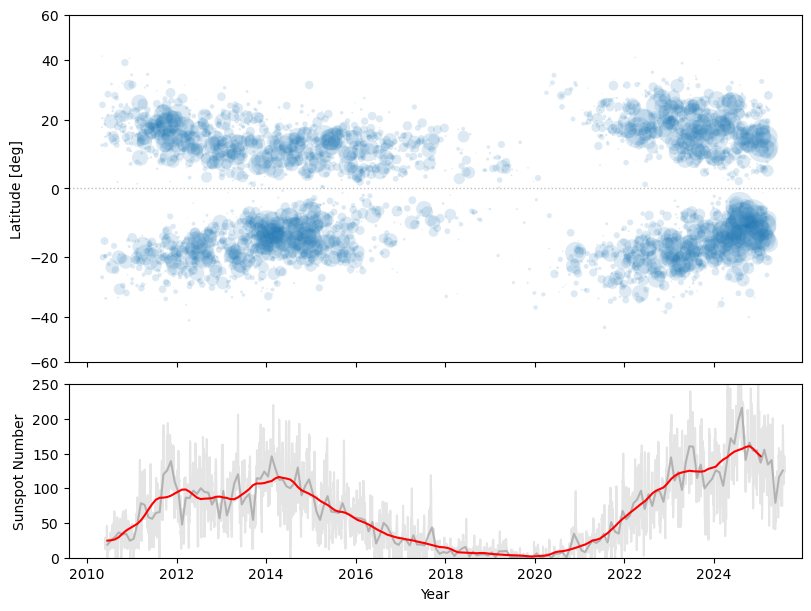

In [8]:
with warnings.catch_warnings():
    warnings.simplefilter('ignore', ErfaWarning)
    fig, (ax1,ax2) = plt.subplots(2,1,figsize=(8,6), layout="constrained",
                            height_ratios=(4,2), sharex=True)

    ax1.scatter(dateobs.to_datetime(), spear_df_good["Lat [Deg]"],
            s=spear_df_good["Area [microHem]"]/20, alpha=0.15, lw=0)

    ax1_xlim = ax1.get_xlim()
    ax2.plot(Time(sn_ms_tot_df["decimal year"].values, format="decimalyear").to_datetime(),
            sn_ms_tot_df["SNvalue"], color="red")

    ax2.plot(Time(sn_d_tot_df["decimal year"].values, format="decimalyear").to_datetime(),
            sn_d_tot_df["SNvalue"], color="gray", alpha=0.2, zorder=0)

    ax2.plot(Time(sn_m_tot_df["decimal year"].values, format="decimalyear").to_datetime(),
            sn_m_tot_df["SNvalue"], color="gray", alpha=0.5, zorder=0)
    ax1.set_xlim(ax1_xlim)
    ax2.set_ylim(0,250)

    def forward(x):
        return np.sin(np.deg2rad(x))
    def inverse(x):
        return np.rad2deg(np.arcsin(x))

    ax1.set_yscale('function', functions=(forward, inverse))
    ax1.set_ylim(-60,60)
    ax1.axhline(0, ls=":", lw=1, alpha=0.5, color="gray")

    ax1.set_ylabel("Latitude [deg]")
    ax2.set_ylabel("Sunspot Number")
    ax2.set_xlabel("Year")

In [9]:
spear_df_good["pos_led"] = np.where(spear_df_good["Lon+ [Deg]"]>spear_df_good["Lon- [Deg]"], True, False)

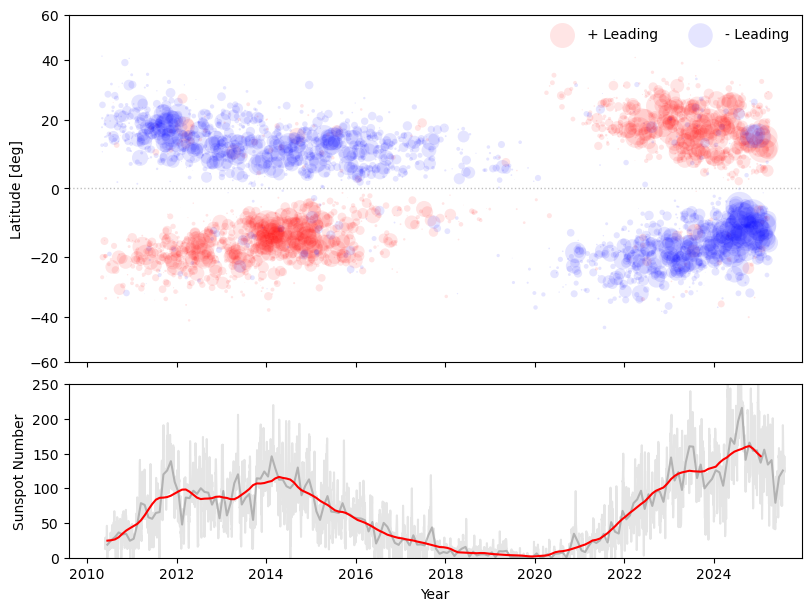

In [10]:
with warnings.catch_warnings():
    warnings.simplefilter('ignore', ErfaWarning)
    fig, (ax1,ax2) = plt.subplots(2,1,figsize=(8,6), layout="constrained",
                            height_ratios=(4,2), sharex=True)

    ax1.scatter(Time(spear_df_good[spear_df_good["pos_led"]]["dateobs"].values).to_datetime(),
            spear_df_good[spear_df_good["pos_led"]]["Lat [Deg]"],
            s=spear_df_good[spear_df_good["pos_led"]]["Area [microHem]"]/20, alpha=0.1, color="red", lw=0,
            label="+ Leading")

    ax1.scatter(Time(spear_df_good[~spear_df_good["pos_led"]]["dateobs"].values).to_datetime(),
            spear_df_good[~spear_df_good["pos_led"]]["Lat [Deg]"],
            s=spear_df_good[~spear_df_good["pos_led"]]["Area [microHem]"]/20, alpha=0.1, color="blue", lw=0,
            label="- Leading")

    def forward(x):
        return np.sin(np.deg2rad(x))
    def inverse(x):
        return np.rad2deg(np.arcsin(x))

    ax1_xlim = ax1.get_xlim()
    ax2.plot(Time(sn_ms_tot_df["decimal year"].values, format="decimalyear").to_datetime(),
            sn_ms_tot_df["SNvalue"], color="red")

    ax2.plot(Time(sn_d_tot_df["decimal year"].values, format="decimalyear").to_datetime(),
            sn_d_tot_df["SNvalue"], color="gray", alpha=0.2, zorder=0)

    ax2.plot(Time(sn_m_tot_df["decimal year"].values, format="decimalyear").to_datetime(),
            sn_m_tot_df["SNvalue"], color="gray", alpha=0.5, zorder=0)
    ax1.set_xlim(ax1_xlim)
    ax2.set_ylim(0,250)

    ax1.set_yscale('function', functions=(forward, inverse))
    ax1.set_ylim(-60,60)
    ax1.axhline(0, ls=":", lw=1, alpha=0.5, color="gray")

    ax1.set_ylabel("Latitude [deg]")
    ax2.set_ylabel("Sunspot Number")
    ax2.set_xlabel("Year")

    ax1.legend(loc="upper right", frameon=False, ncol=2)

In [16]:
# --- Prepare data ---
lat_pos = spear_df_good[spear_df_good["pos_led"]]["Lat [Deg]"].values
lat_neg = spear_df_good[~spear_df_good["pos_led"]]["Lat [Deg]"].values
time_pos = Time(spear_df_good[spear_df_good["pos_led"]]["dateobs"].values).to_datetime()
time_neg = Time(spear_df_good[~spear_df_good["pos_led"]]["dateobs"].values).to_datetime()
size_pos = spear_df_good[spear_df_good["pos_led"]]["Area [microHem]"].values / 200
size_neg = spear_df_good[~spear_df_good["pos_led"]]["Area [microHem]"].values / 200

lat_pos_trans = np.sin(np.deg2rad(lat_pos))
lat_neg_trans = np.sin(np.deg2rad(lat_neg))

time_sn_ms = Time(sn_ms_tot_df["decimal year"].values, format="decimalyear").to_datetime()
time_sn_d  = Time(sn_d_tot_df["decimal year"].values, format="decimalyear").to_datetime()
time_sn_m  = Time(sn_m_tot_df["decimal year"].values, format="decimalyear").to_datetime()

# --- Create figure with subplots ---
fig = make_subplots(
    rows=2, cols=1,
    shared_xaxes=True,
    row_heights=[0.7, 0.3],
    vertical_spacing=0.05,
    # subplot_titles=("Latitude [deg]", "Sunspot Number")
)

# --- Top scatter plot (Latitude, grouped as 'lat') ---
fig.add_trace(go.Scatter(
    x=time_pos, y=lat_pos_trans,
    mode="markers",
    marker=dict(size=size_pos, color="red", opacity=0.1, line=dict(width=0)),
    name="+ Leading",
    legendgroup="lat",     # group for top subplot
    showlegend=True
), row=1, col=1)

fig.add_trace(go.Scatter(
    x=time_neg, y=lat_neg_trans,
    mode="markers",
    marker=dict(size=size_neg, color="blue", opacity=0.1, line=dict(width=0)),
    name="- Leading",
    legendgroup="lat",
    showlegend=True
), row=1, col=1)

# Reference line
fig.add_hline(y=0, line=dict(dash="dot", width=1, color="gray"), row=1, col=1)

# --- Bottom line plots (Sunspot numbers, grouped as 'sn') ---
fig.add_trace(go.Scatter(
    x=time_sn_ms, y=sn_ms_tot_df["SNvalue"],
    mode="lines", line=dict(color="red"),
    name="SN MS",
    legendgroup="sn",
    showlegend=True
), row=2, col=1)

fig.add_trace(go.Scatter(
    x=time_sn_d, y=sn_d_tot_df["SNvalue"],
    mode="lines", line=dict(color="gray", width=1),
    opacity=0.2, name="SN daily",
    legendgroup="sn",
    showlegend=True
), row=2, col=1)

fig.add_trace(go.Scatter(
    x=time_sn_m, y=sn_m_tot_df["SNvalue"],
    mode="lines", line=dict(color="gray", width=1),
    opacity=0.5, name="SN monthly",
    legendgroup="sn",
    showlegend=True
), row=2, col=1)

# --- Axes formatting ---
fig.update_yaxes(
    title_text="Latitude [deg]",
    row=1, col=1,
    range=[np.sin(np.deg2rad(-60)), np.sin(np.deg2rad(60))],
    tickmode="array",
    tickvals=np.sin(np.deg2rad([-60,-30,0,30,60])),
    ticktext=["-60","-30","0","30","60"]
)
fig.update_yaxes(title_text="Sunspot Number", range=[0, 250], row=2, col=1)
fig.update_xaxes(title_text="Year", row=2, col=1)

# --- Layout tweaks ---
fig.update_layout(
    height=768, width=1024,
    legend=dict(
        yanchor="top",
        y=0.95,        # place legend near top
        x=1.05,        # push legend outside the plot
        xanchor="left",
        tracegroupgap=12   # visual separation between 'lat' and 'sn'
    ),
    margin=dict(l=60, r=120, t=40, b=50)
)

fig.write_html("sunspot_plot.html", include_plotlyjs="cdn")